In [123]:
import duckdb as db
import polars as pl
import pandas as pd
from pathlib import Path

In [124]:
parquet_file = Path("/home/sean/Projects/streambt/full_df_debug.pl.parquet")
full_df = pl.read_parquet(parquet_file).rename({'Date':'Date_index', 'Date_str':'Date'})

In [125]:

full_df.columns

['Date_index',
 'Ticker',
 'Adj Close',
 'Close',
 'Dividends',
 'High',
 'Low',
 'Open',
 'Stock Splits',
 'Volume',
 'Date',
 'ema_close_12_wilder',
 'ema_close_26_wilder',
 'macd',
 'cap_xchgd_approx',
 '_close_prev',
 '_trh',
 '_trl',
 '_ad',
 'ema_ad',
 'ema_volume',
 'TMF_w',
 'TMF_4w_min',
 'TMF_26w_min',
 'TMF_4w_min_dd',
 'TMF_26w_min_dd',
 '__TMF_4w_min_dd_qtl_50_neg',
 '__TMF_26w_min_dd_qtl_50_neg',
 'TMF_4w_min_dd_qtl_50',
 'TMF_4w_min_dd_qtl_50_alt',
 'TMF_26w_min_dd_qtl_50',
 'TMF_26w_min_dd_qtl_50_alt',
 '_chg',
 '_avg_gain',
 '_avg_loss',
 'rsi_ema',
 '_ma_avg_gain',
 '_ma_avg_loss',
 'rsi',
 'TMF_Simple_Signal',
 'up',
 'dn',
 'PDM',
 'NDM',
 'TR',
 'ATR',
 'PDI',
 'NDI',
 'DX',
 'ADX']

# sample data

In [126]:
df = full_df.filter(pl.col('Ticker')=='CBA.AX').to_pandas()
df['Date']

0      2000-01-03
1      2000-01-04
2      2000-01-05
3      2000-01-06
4      2000-01-07
          ...    
6376   2025-01-22
6377   2025-01-23
6378   2025-01-24
6379   2025-01-28
6380   2025-01-29
Name: Date, Length: 6381, dtype: datetime64[ns]

# check tmf

               TMF_w  TMF_4w_min  TMF_26w_min
Date                                         
2000-05-22  0.154019   -0.013406          NaN
2000-05-23  0.159023   -0.013406          NaN
2000-05-24  0.186422   -0.013406          NaN
2000-05-25  0.094497   -0.013406          NaN
2000-05-26  0.134006   -0.013406          NaN
...              ...         ...          ...
2003-10-27 -0.263031   -0.263031     -0.43057
2003-10-28 -0.310001   -0.310001     -0.43057
2003-10-29 -0.270182   -0.310001     -0.43057
2003-10-30 -0.230169   -0.310001     -0.43057
2003-10-31 -0.238852   -0.310001     -0.43057

[900 rows x 3 columns]


<Axes: xlabel='Date'>

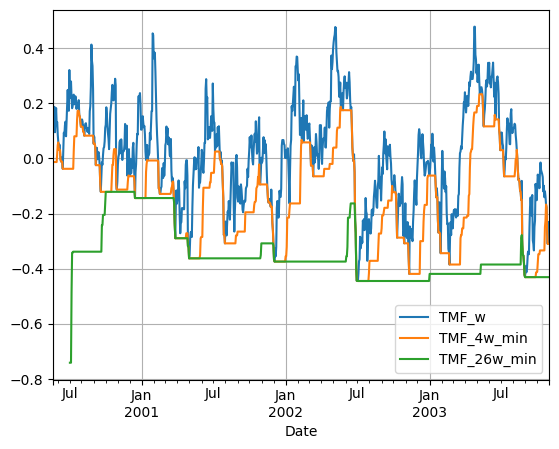

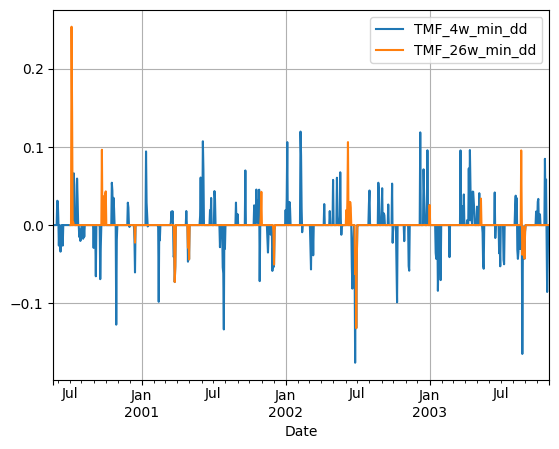

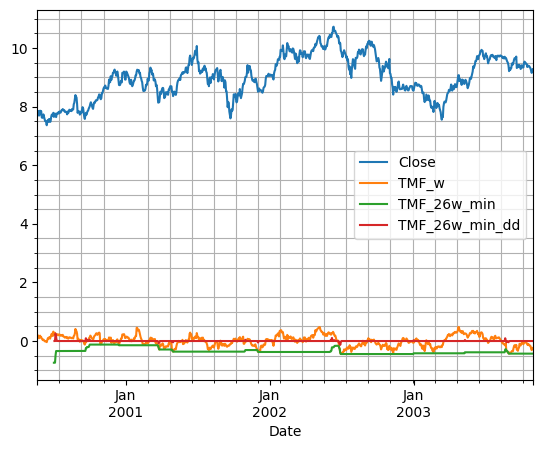

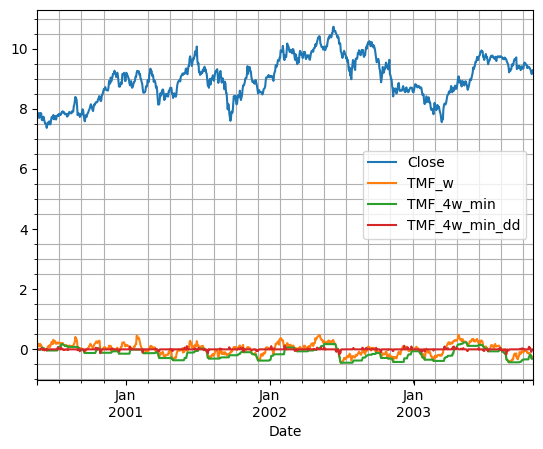

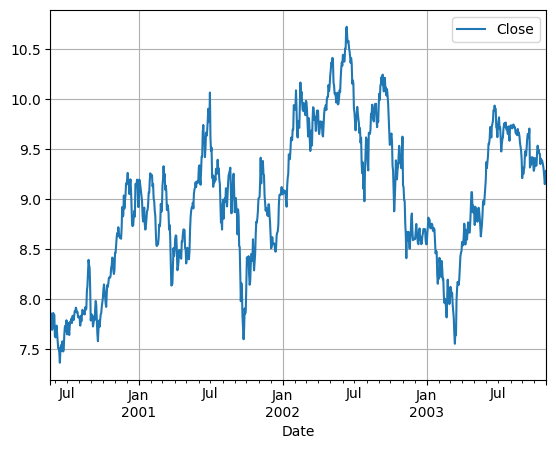

In [127]:
s,e = 100,1000

#focus = df[['Date','TMF_w','TMF_wa',"TMF_4w_min","TMF_8w_min","TMF_26w_min"]].iloc[s:e]
focus = df[['Date','TMF_w',"TMF_4w_min","TMF_26w_min"]].iloc[s:e].set_index('Date')
print(focus)
focus.plot(grid=True,sharey=False)#,subplots=True)
#focus = df[['Date','macd','macd_wa','macd_signal','macd_signal_wa']].iloc[s:e]
#focus.plot(grid=True,sharey=False)#,subplots=True)

focus = df[['Date',"TMF_4w_min_dd", "TMF_26w_min_dd"]].iloc[s:e].set_index('Date')
focus.plot(grid=True,sharey=False)#,subplots=True)

focus = df[['Date','Close', 'TMF_w',"TMF_26w_min","TMF_26w_min_dd"]].iloc[s:e].set_index('Date')
ax = focus.plot(grid=True,sharey=False)#,subplots=True)
ax.minorticks_on()
ax.grid(which='both')


focus = df[['Date','Close', 'TMF_w',"TMF_4w_min","TMF_4w_min_dd"]].iloc[s:e].set_index('Date')
ax = focus.plot(grid=True,sharey=False)#,subplots=True)
ax.minorticks_on()
ax.grid(which='both')
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    display(focus)

focus = df[['Date','Close']].iloc[s:e].set_index('Date')
focus.plot(grid=True,sharey=False)#,subplots=True)



# check adx

In [128]:
df[['DX', 'ADX']]

,DX,ADX
0,NaN,0.000000
1,1.000000,0.518519
2,1.000000,0.691042
3,1.000000,0.777067
4,1.000000,0.828494
...,...,...
6376,0.067726,0.148828
6377,0.048590,0.141668
6378,0.130283,0.140855
6379,0.177678,0.143485


In [129]:
df[['DX']].ewm(com=14-1).mean()

,DX
0,NaN
1,1.000000
2,1.000000
3,1.000000
4,1.000000
...,...
6376,0.148828
6377,0.141668
6378,0.140855
6379,0.143485


                 PDI       NDI
Date                          
2023-02-08  0.304935  0.174643
2023-02-09  0.295108  0.209087
2023-02-10  0.276403  0.197999
2023-02-13  0.252828  0.218793
2023-02-14  0.269360  0.202445
...              ...       ...
2024-08-30  0.391361  0.171055
2024-09-02  0.420971  0.153549
2024-09-03  0.445365  0.143097
2024-09-04  0.383588  0.201619
2024-09-05  0.380984  0.195248

[400 rows x 2 columns]
                  DX       ADX
Date                          
2023-02-08  0.271681  0.227495
2023-02-09  0.170610  0.223431
2023-02-10  0.165269  0.219277
2023-02-13  0.072165  0.208769
2023-02-14  0.141826  0.203987
...              ...       ...
2024-08-30  0.391715  0.307929
2024-09-02  0.465471  0.319182
2024-09-03  0.513659  0.333073
2024-09-04  0.310948  0.331493
2024-09-05  0.322327  0.330838

[400 rows x 2 columns]


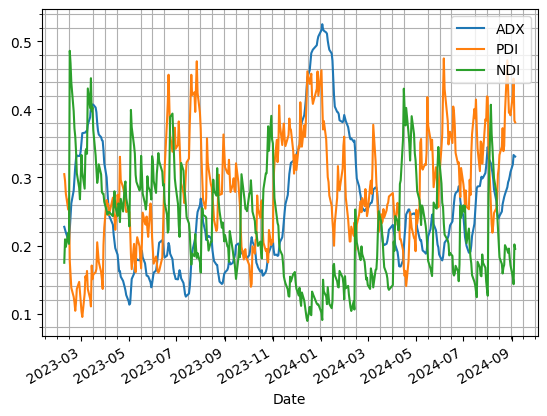

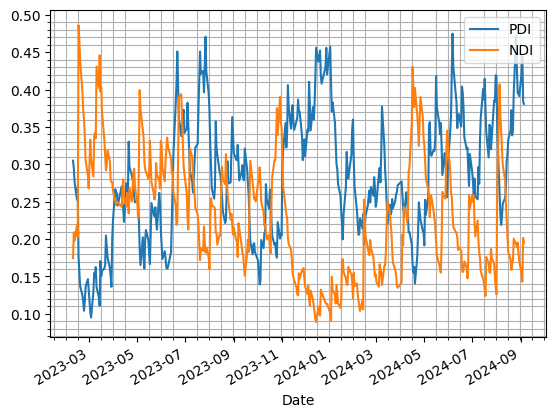

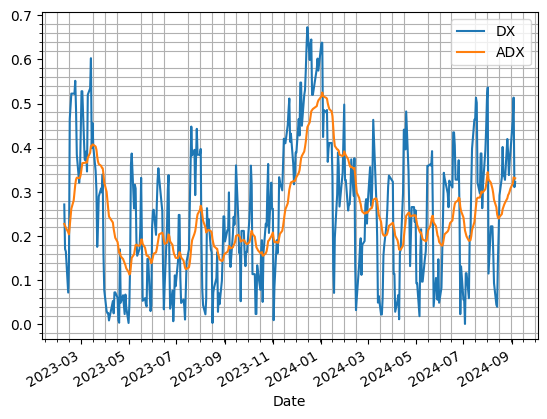

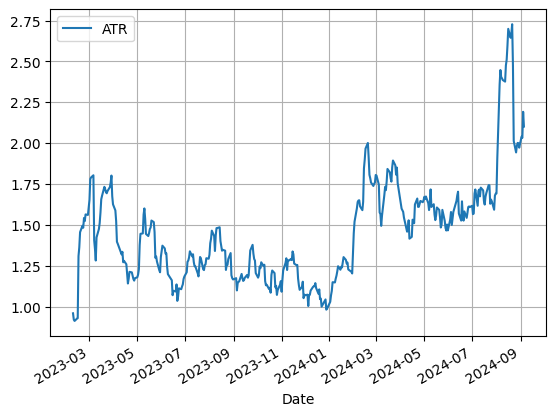

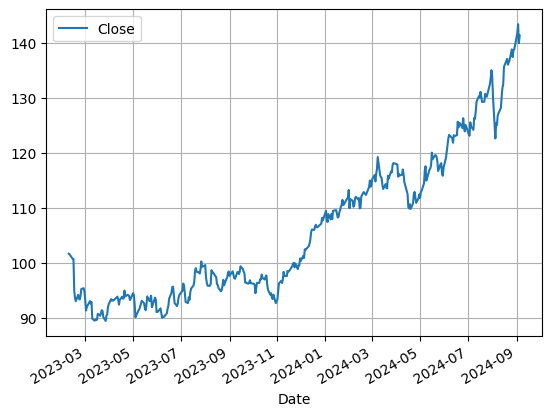

In [133]:
#s,e = -340,-330
s,e = -500,-100

focus = df[['Date', 'ADX',"PDI","NDI"]].iloc[s:e].set_index('Date')
ax = focus.plot(grid=True,sharey=False)#,subplots=True)
ax.minorticks_on()
ax.grid(which='both')

focus = df[['Date',"PDI","NDI"]].iloc[s:e].set_index('Date')
#focus['test'] =  (focus['PDI']-focus['NDI']).abs()/(focus['PDI']+focus['NDI']).abs()
print(focus)
ax = focus.plot(grid=True,sharey=False)#,subplots=True)
ax.minorticks_on()
ax.grid(which='both')

focus = df[['Date','DX', "ADX"]].iloc[s:e].set_index('Date')
#focus['test'] =  (focus['PDI']-focus['NDI']).abs()/(focus['PDI']+focus['NDI']).abs()
print(focus)
ax = focus.plot(grid=True,sharey=False)#,subplots=True)
ax.minorticks_on()
ax.grid(which='both')

focus = df[['Date','ATR']].iloc[s:e].set_index('Date')
focus.plot(grid=True,sharey=False)#,subplots=True)
ax.minorticks_on()
ax.grid(which='both')

focus = df[['Date','Close']].iloc[s:e].set_index('Date')
focus.plot(grid=True,sharey=False)#,subplots=True)
ax.minorticks_on()
ax.grid(which='both')

